In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-using-name-only-0-81818/__results__.html
/kaggle/input/titanic-using-name-only-0-81818/__notebook__.ipynb
/kaggle/input/titanic-using-name-only-0-81818/__output__.json
/kaggle/input/titanic-using-name-only-0-81818/custom.css
/kaggle/input/titanic-using-name-only-0-81818/__results___files/__results___20_1.png
/kaggle/input/titanic-using-name-only-0-81818/__results___files/__results___11_2.png
/kaggle/input/titanic-using-name-only-0-81818/__results___files/__results___16_1.png
/kaggle/input/titanic-using-name-only-0-81818/__results___files/__results___12_2.png
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
print("Setup 1 Complete")

Setup 1 Complete


In [5]:
# modules we'll use
import numpy as np

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup 2 Complete")

Setup 2 Complete


# **Creating our Path**

This is where our fath to our input file is created and where we put it into the dataframe "Titanic_Data"

In [6]:
Titanic_Data_Path = '/kaggle/input/titanic/train.csv'
Titanic_Data = pd.read_csv(Titanic_Data_Path)
Titanic_Data.head()

#Pclass - 1st = Upper, 2nd = Middle, 3rd = Lower

#sibsp: The dataset defines family relations in this way...
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)

#parch: The dataset defines family relations in this way...
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Inportant Info**

**This is where we learn the meaning behind the values that will be used or explored in this notebook.

In [4]:
#Variable	Definition	Key
#survival	Survival	0 = No, 1 = Yes
#pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#sex	Sex	
#Age	Age in years	
#sibsp	# of siblings / spouses aboard the Titanic	
#parch	# of parents / children aboard the Titanic	
#ticket	Ticket number	
#fare	Passenger fare	
#cabin	Cabin number	
#embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# **Finding Our DataTypes**

In the code below is where we are  going to print each dataType of the existing coulmn to see whech one is categorical (Type: object
) or numerical. 
The reason we want do the what kind of the dat types are in oput data set is because categorical values often need to be hot encoded in order fro our machine learning model to accpet it.

In [10]:
Titanic_Data.columns
for col in Titanic_Data.columns:
    print( "Name: " + col + "        Type: " + str(Titanic_Data[col].dtype) )

print()

for col in Titanic_Data.columns:
    if Titanic_Data[col].dtype != object:
        print( "Name: " + col + "        Type: " + str(Titanic_Data[col].dtype) )
   

Name: PassengerId        Type: int64
Name: Survived        Type: int64
Name: Pclass        Type: int64
Name: Name        Type: object
Name: Sex        Type: object
Name: Age        Type: float64
Name: SibSp        Type: int64
Name: Parch        Type: int64
Name: Ticket        Type: object
Name: Fare        Type: float64
Name: Cabin        Type: object
Name: Embarked        Type: object

Name: PassengerId        Type: int64
Name: Survived        Type: int64
Name: Pclass        Type: int64
Name: Age        Type: float64
Name: SibSp        Type: int64
Name: Parch        Type: int64
Name: Fare        Type: float64


# **See which colunms or variables have missing values**

We need to see if any columns within the dataset has any missing values as our machine learning model won't accept them. To solve this problem we can us etwo solution. The first one is just getting rid of the row with unknow, or the second one is putb the vaege of the vales before and after the unknown make that its subsite value.

In [6]:
missing_values_count = Titanic_Data.isnull().sum()
missing_values_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **How class explains all**

My inital question is to see rather or not class was a huge factor on rather or not a passgner survived the Titanic or not. In which my hypothesis is that it was the main factor on decding on a person chances of survival in the ship. This hypothesis makes sense, as we have often seen throughout history and today how rich people are prioritized over others due to their access to excessive resources.

In [7]:
Titanic_Data_values_count = Titanic_Data.Pclass.value_counts()
Titanic_Data_values_count

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
P1_values_count = Titanic_Data.loc[(Titanic_Data.Pclass == 1) ]
P1_values_count.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
P2_values_count = Titanic_Data.loc[(Titanic_Data.Pclass == 2) ]
P2_values_count.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [9]:
P3_values_count = Titanic_Data.loc[(Titanic_Data.Pclass == 3) ]
P3_values_count.tail()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [13]:
print(P1_values_count.Embarked.value_counts())
print(P2_values_count.Embarked.value_counts())
print(P3_values_count.Embarked.value_counts())

Embarked
S    127
C     85
Q      2
Name: count, dtype: int64
Embarked
S    164
C     17
Q      3
Name: count, dtype: int64
Embarked
S    353
Q     72
C     66
Name: count, dtype: int64


# **Seeing the percentage missing**

After exploring Pclass a bit we firgue out oon how much unkowns or blanks are in our dataset and seeing how big of a deal it is. 

In [8]:
total_cells = np.product(Titanic_Data.shape)
print(total_cells)
total_missing = missing_values_count.sum()
print(total_missing)

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

10692
866
8.099513655069211


# **Using plots to see variables relationship with each other**

Well the goal is to see rather or not our model can predict on rather each passnger survied or didn't. The first up are scatter plots for Age vs Survied vaiables. As we seen here the disburtion for all ages (except under 10) are very similar meaning that Age didn't really factor on rather or not you survied. The other scotter plots shown here (expect for  Fare vs Survived which we will talk about later) show similar result of the disbrution being relavtivly equal. This probbaly mean that a new for of plot should be used when exploring this data and espically if we want to see if class was one of the decieding factors in someoone survving. But, one good thing that came from using scatte rplots is that it highlighted a neeed for another model besided Random Tree, which is Logestic Regression.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

<Axes: xlabel='Age', ylabel='Survived'>

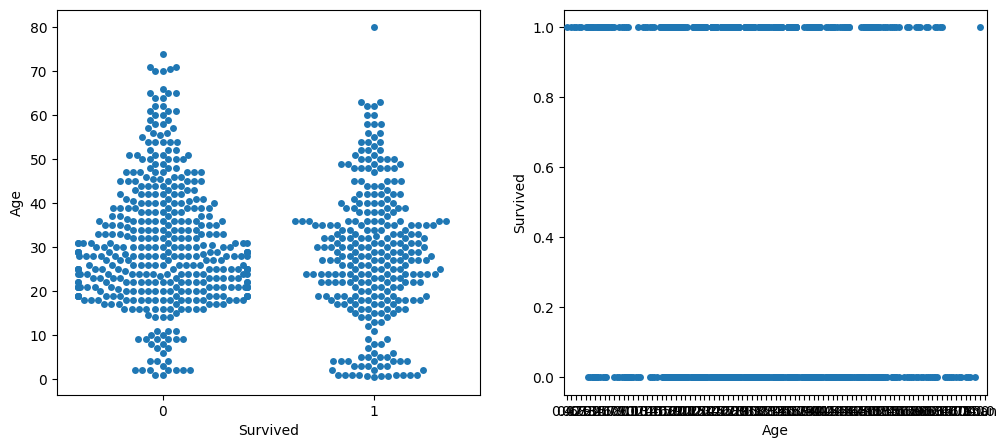

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.swarmplot(x=Titanic_Data['Survived'], y=Titanic_Data['Age'], ax=axes[0])
sns.swarmplot(x=Titanic_Data['Age'], y=Titanic_Data['Survived'], ax=axes[1])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the mar

<Axes: xlabel='Pclass', ylabel='Survived'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 86.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 83.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


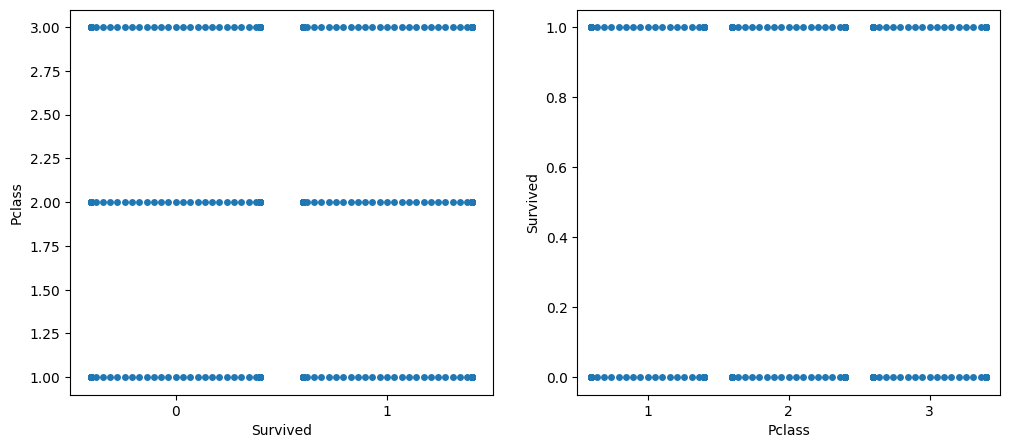

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.swarmplot(x=Titanic_Data['Survived'], y=Titanic_Data['Pclass'], ax=axes[0])
sns.swarmplot(x=Titanic_Data['Pclass'], y=Titanic_Data['Survived'], ax=axes[1])

# **How family influence the chance of survival**

Basically as shown from 'SibSp vs Survived' and 'Parch vs Survived' scatter plots its shown that have more family emeber decreases your chances of survival in the ship

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 74.5% of the points cannot be placed; you may want to decrease the size of the mar

<Axes: xlabel='SibSp', ylabel='Survived'>

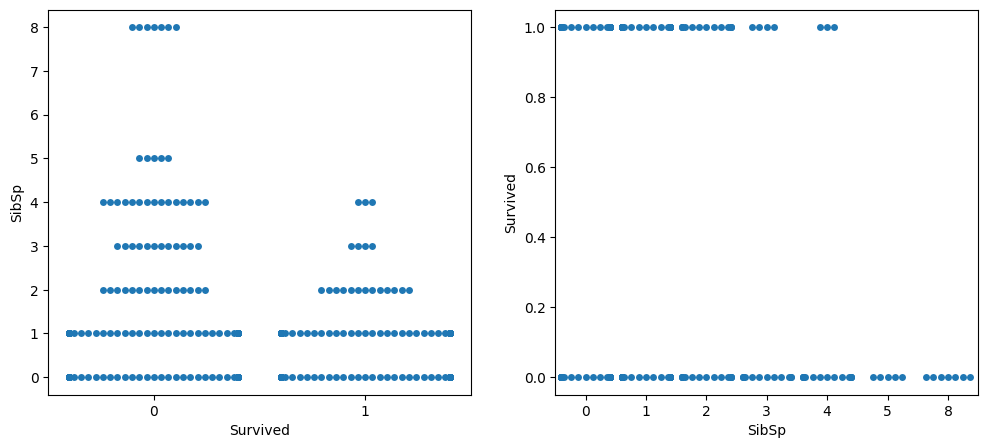

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.swarmplot(x=Titanic_Data['Survived'], y=Titanic_Data['SibSp'], ax=axes[0])
sns.swarmplot(x=Titanic_Data['SibSp'], y=Titanic_Data['Survived'], ax=axes[1])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the mar

<Axes: xlabel='Parch', ylabel='Survived'>

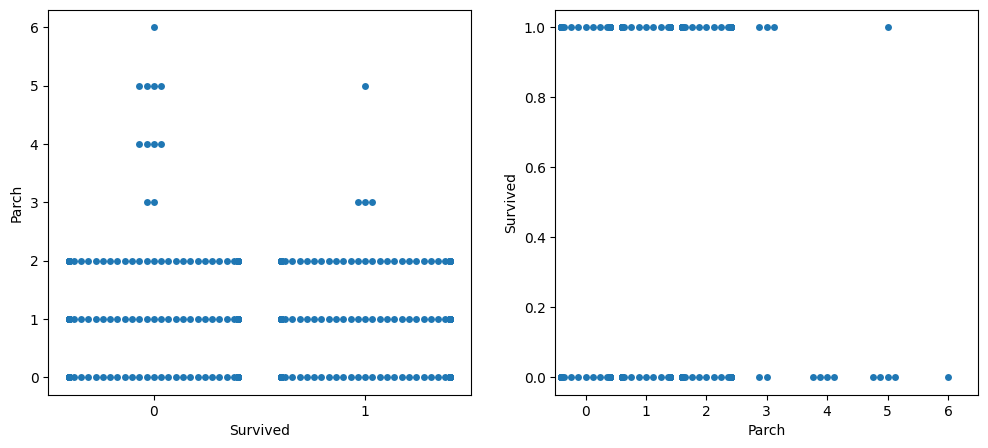

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.swarmplot(x=Titanic_Data['Survived'], y=Titanic_Data['Parch'], ax=axes[0])
sns.swarmplot(x=Titanic_Data['Parch'], y=Titanic_Data['Survived'], ax=axes[1])

# **How my inital hypothesis was proven correct**

The scatter plot below showcases how most of the people who paid under 100 dallors in terms of fare were much more likly tod ie vs other who paid more. Which showcases how the rich was prioritized when it comes to evacuation plans

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the mar

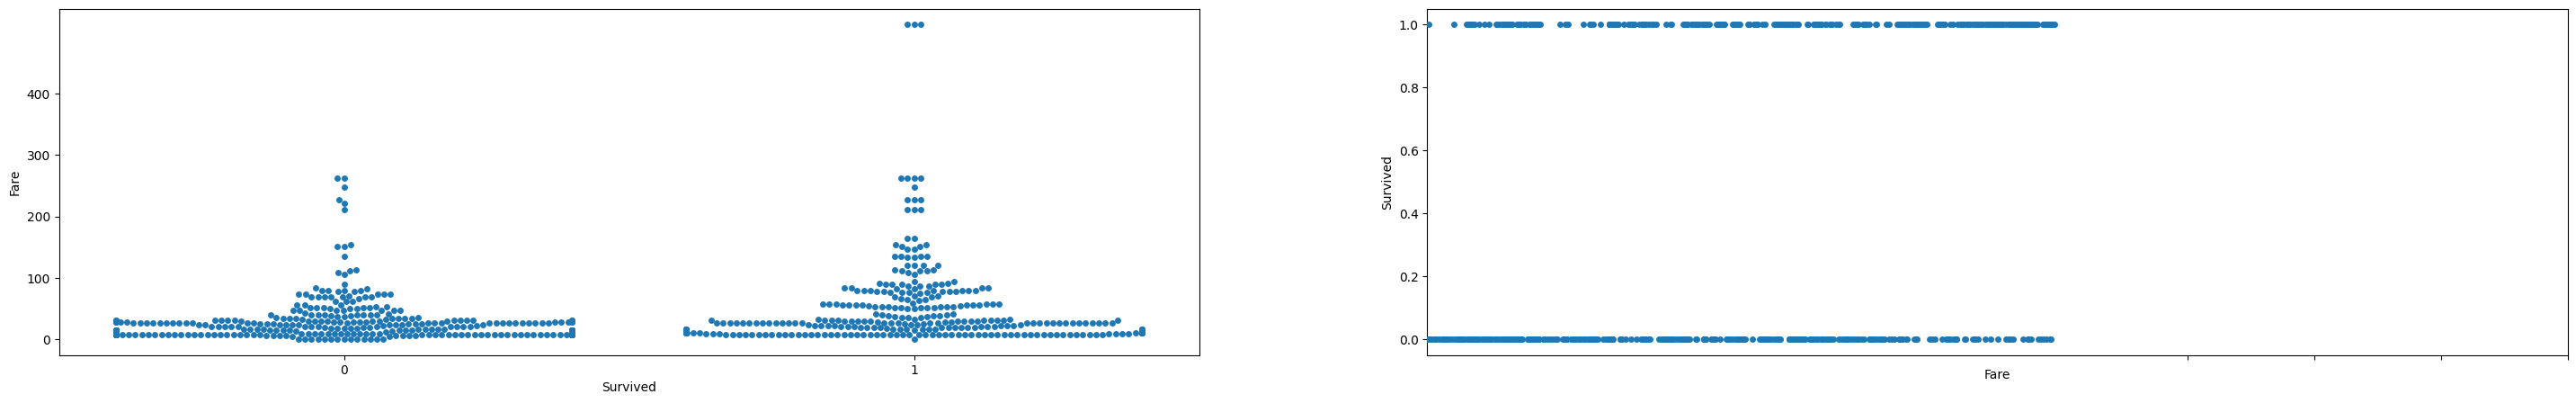

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(36, 5))
sns.swarmplot(x=Titanic_Data['Survived'], y=Titanic_Data['Fare'], ax=axes[0])
sns.swarmplot(x=Titanic_Data['Fare'], y=Titanic_Data['Survived'], ax=axes[1])

axes[0].set_yticks(np.arange(0, 500, 100))  # Setting y-ticks for the first plot
axes[1].set_xticks(np.arange(300, 500, 50)) 

# **Using Hisgrams Plots**

We are now seeing if having out data formatted as disbrutions verse scatter point will give more insights.

# **Fare Influence**

As we seen here the maount of people who paid less than 100 dallors in the titanic makes up the majoirty in people who didn't survive, as seen from the narrow spike (peak) in hour disbrution. This supports my hypothesis that which peolpe werethough of first when the plan to escape were being to manifest. While as shown here the for the people that did survive is more wider and shorter meaning that if you paied over a hundred dallors your chance of survival increaes. It interesting as people who paid zero in terms of fare are more likey to survive, but it can be chalk up to worker being able to escape the cship (and plus I THINK there well reltively well off since they worked on a failry popular boat)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


<ipython-input-16-a7a95bccad2a>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Titanic_Data, x='Fare', hue='Survived', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Fare', ylabel='Density'>

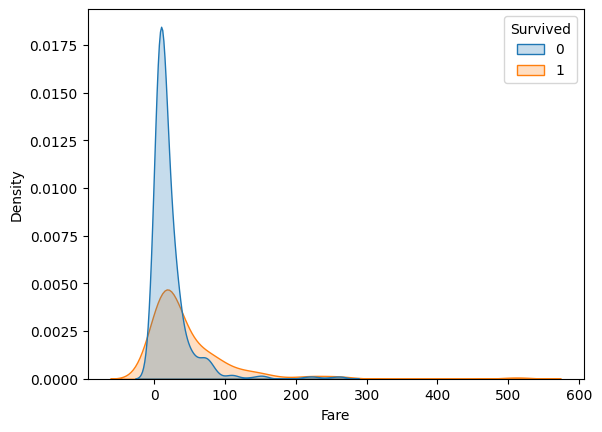

In [16]:
sns.kdeplot(data=Titanic_Data, x='Fare', hue='Survived', shade=True)

# **Pclass Influence**

The histgram below like the one above again supports my hypothesis that rich people got priority over other as you see most people in the Pclass 3 (lower class) were way out number than the one who were able to, while the invser (even when the difference is not as great) is true for people in Pclass 1 (upperclass).

<ipython-input-17-31abf9b03b2b>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Titanic_Data, x='Pclass', hue='Survived', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to

<Axes: xlabel='Pclass', ylabel='Density'>

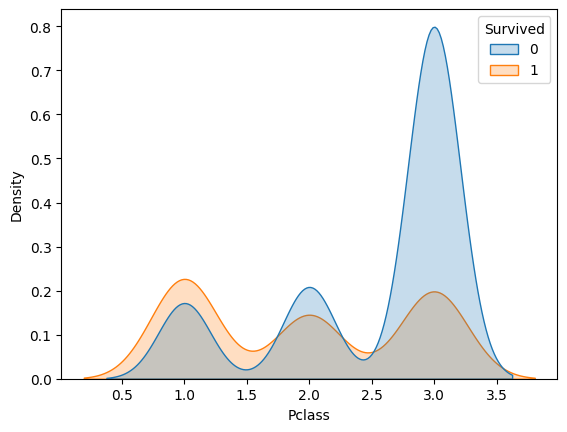

In [17]:
sns.kdeplot(data=Titanic_Data, x='Pclass', hue='Survived', shade=True)

# **The chance of you surviving if alone**

As shown from the histogram below, people who had no family relation such as parent or kid were much likey to not survive vs people who those relations on board with them. It makes sense as immgrants during that time will try ton incease the social stuas if themselves and their familiy by going on boardships and heading to different countries like America in order to work and send mony back to their love onse. The immgrants who were more liely to do this were probbaly poor, which would match with current(personal) observations about todays imgrantion, which would support my hypothesis.

<ipython-input-18-78b5eb735916>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Titanic_Data, x='Parch', hue='Survived', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='Parch', ylabel='Density'>

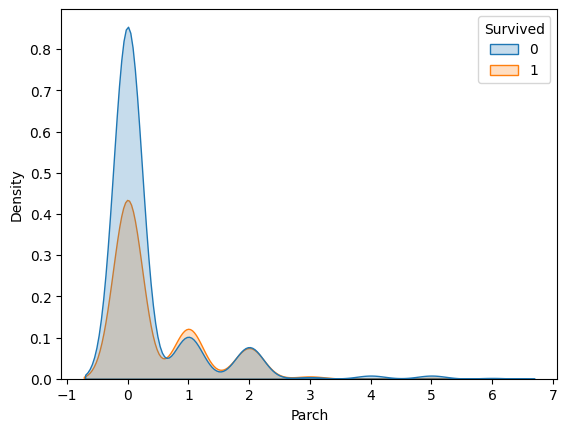

In [18]:
sns.kdeplot(data=Titanic_Data, x='Parch', hue='Survived', shade=True)

<ipython-input-19-f163866047f9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Titanic_Data, x='SibSp', hue='Survived', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='SibSp', ylabel='Density'>

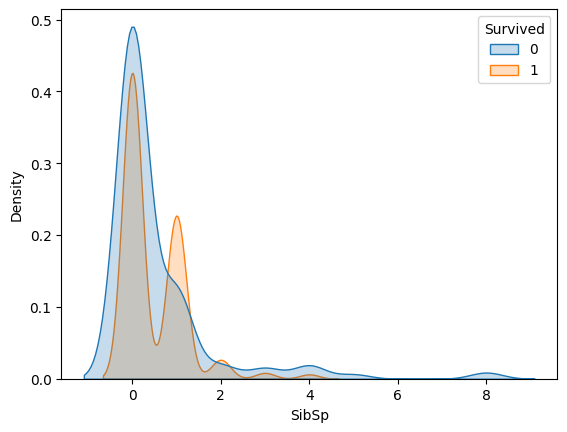

In [19]:
sns.kdeplot(data=Titanic_Data, x='SibSp', hue='Survived', shade=True)

<ipython-input-20-8496c342425f>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Titanic_Data, x='Age', hue='Survived', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Age', ylabel='Density'>

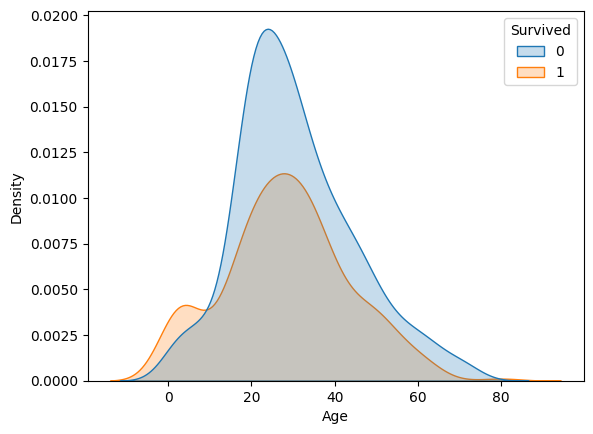

In [20]:
sns.kdeplot(data=Titanic_Data, x='Age', hue='Survived', shade=True)

# **Seeing if Sex has an influence**

At first I similarb top many other people would assume that women would be first over men to be allow to escape the ship, this assumpation is supported by the data as you seen that you are more likey to not survive if you are a male comapre if you were a female. But, if you look at the histogram in terms of the variable Sex and Pclass, it shocases a interesting story how most of the men on the ship were lower class (as I assume supprt my points about immgrnats from eailer), which meant taht evn ifsex may have played a role, many men on the boat were likey not priorize not for their gender but becaus etheir were of lower class.

<ipython-input-21-fc803acb4339>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Titanic_Data, x='Survived', hue='Sex', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

<Axes: xlabel='Survived', ylabel='Density'>

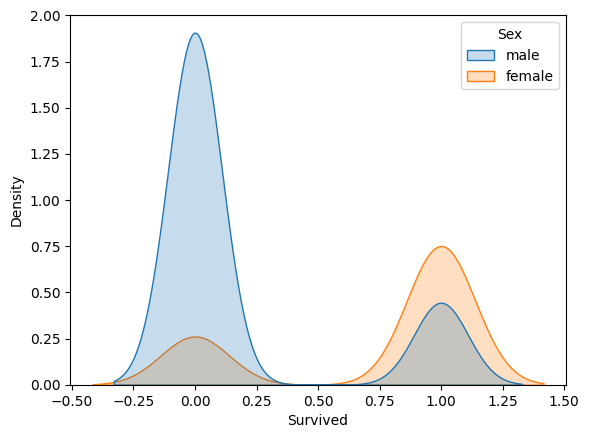

In [21]:
sns.kdeplot(data=Titanic_Data, x='Survived', hue='Sex', shade=True)

<ipython-input-22-288fdae9a21c>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Titanic_Data, x='Pclass', hue='Sex', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_

<Axes: xlabel='Pclass', ylabel='Density'>

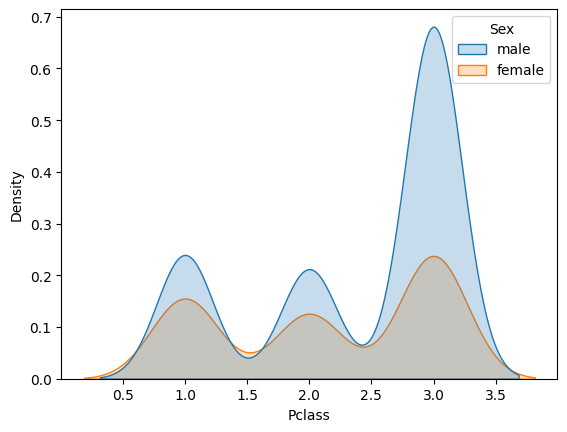

In [22]:
sns.kdeplot(data=Titanic_Data, x='Pclass', hue='Sex', shade=True)

<ipython-input-23-5aaac6f99c64>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Titanic_Data, x='Survived', hue='Pclass', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to

<Axes: xlabel='Survived', ylabel='Density'>

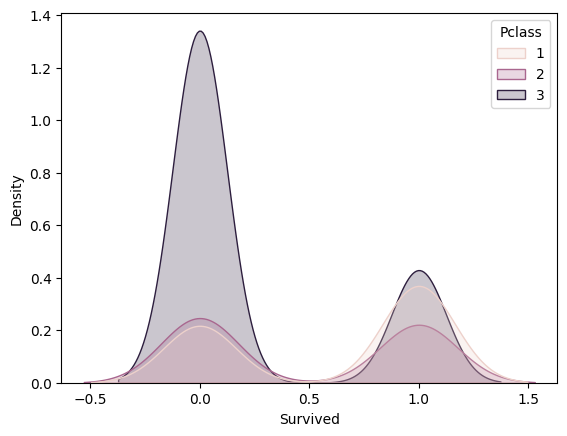

In [23]:
sns.kdeplot(data=Titanic_Data, x='Survived', hue='Pclass', shade=True)

<ipython-input-24-47351f8223a9>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Titanic_Data, x='Survived', hue='Embarked', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple 

<Axes: xlabel='Survived', ylabel='Density'>

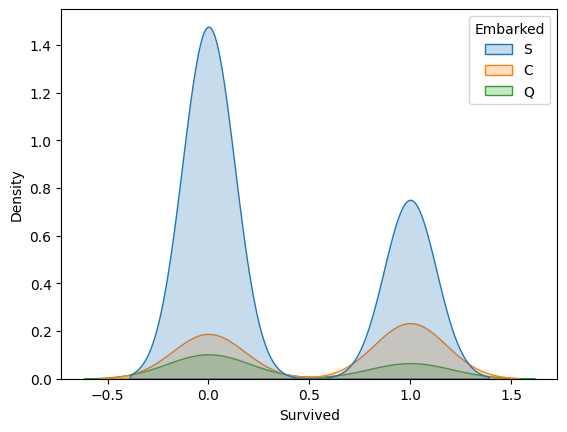

In [24]:
sns.kdeplot(data=Titanic_Data, x='Survived', hue='Embarked', shade=True)

# **Using scater poits gainbut with linear slopes!**

Despite the plots (espically the first two) being kind of iffy it does demonstrates a posive relationship between family relation and what class  someone is in. As shown in thes plots the more family someone has on board, the more liklley they are in a higer class, which amkes sense on why people who didn't surve were more likey to be alone on the ship as they were again from lower classes.

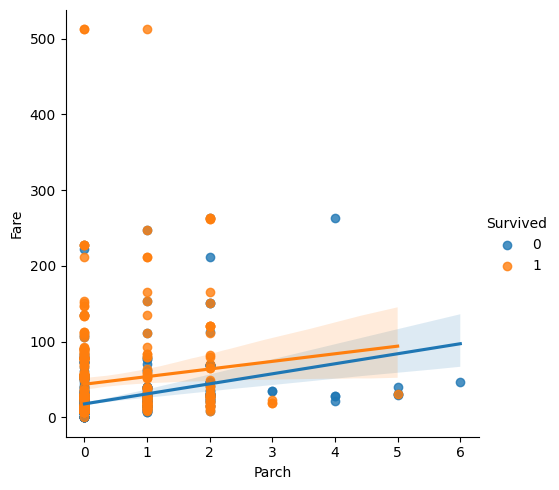

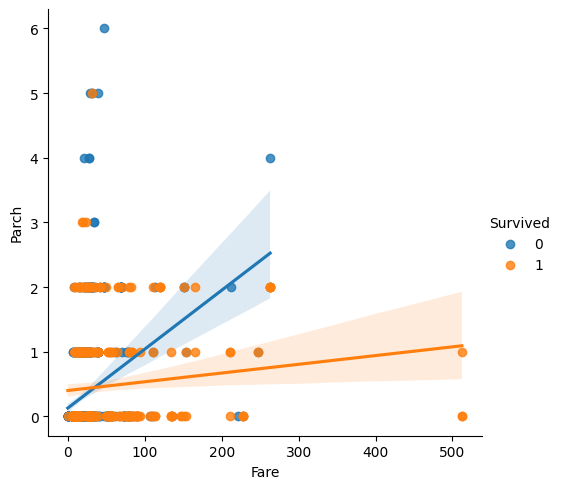

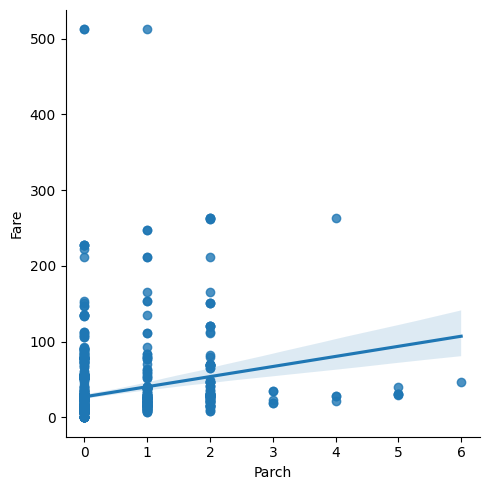

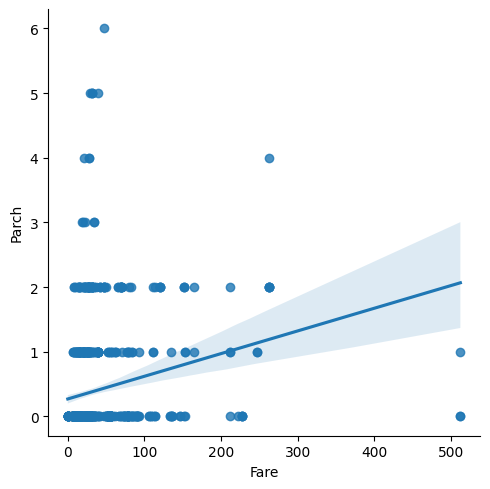

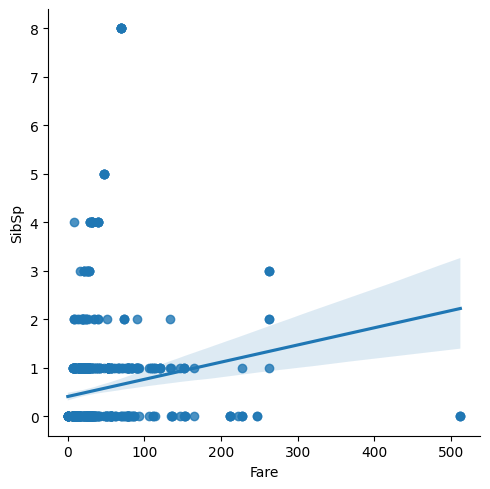

In [26]:
sns.lmplot(x="Parch", y='Fare', hue='Survived', data=Titanic_Data)
sns.lmplot(x='Fare', y="Parch", hue='Survived', data=Titanic_Data)
sns.lmplot(x="Parch", y='Fare', data=Titanic_Data)
sns.lmplot(x='Fare', y="Parch", data=Titanic_Data)
sns.lmplot(x='Fare', y="SibSp", data=Titanic_Data)

# **Using dropna to clean our data as our first solution**

Remember how I talked about how machine learning models won't accpets data if unknowns or blanks, whell again on of the solution for that is to  drop any row that has any unknwns (even when it can lead to a bit more error than other solutions).

In [28]:
Titanic_Clean_Data = Titanic_Data.dropna()
Titanic_Clean_Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [10]:
missing_values_count2 = Titanic_Clean_Data.isnull().sum()
missing_values_count2

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# **Something don't look right**

From looking at our histogram plots it slooks like we took more data tan we actaully realized! Using the number of total data points (in tital) and unknowns within each Pclass from each dataset (the original and tyhe currnet one) we can see that over 90 percent of data from Pclass 2 and Pclass3 were taken away which it really horribale. Buut tis situation showcases that a lot of people that survived were upper class as there were around the end to be able to tell their stories. Also, look like we have to gop towward the second solutions interms of cleaning our data for our machine learning models.

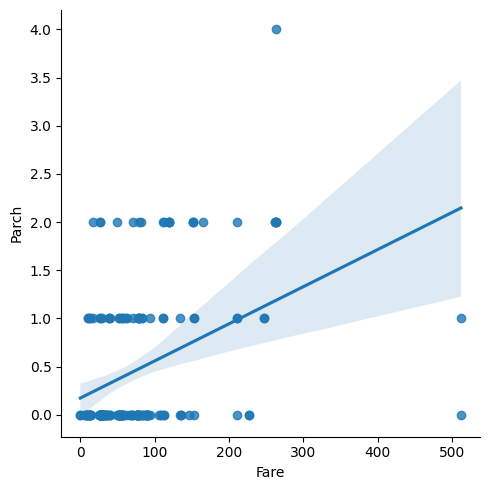

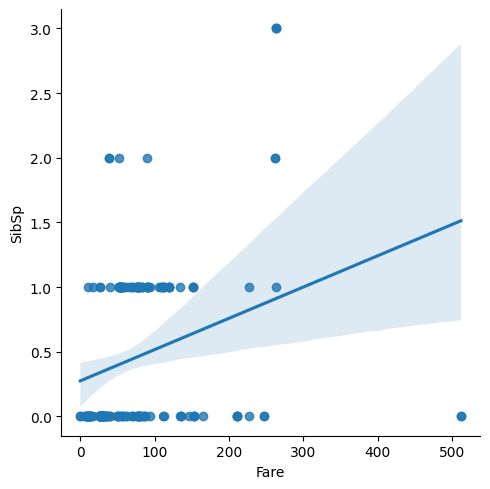

In [29]:
sns.lmplot(x='Fare', y="Parch", data=Titanic_Clean_Data)
sns.lmplot(x='Fare', y="SibSp", data=Titanic_Clean_Data)

<ipython-input-30-661df9ef7a08>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Titanic_Clean_Data, x='Fare', hue='Survived', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Fare', ylabel='Density'>

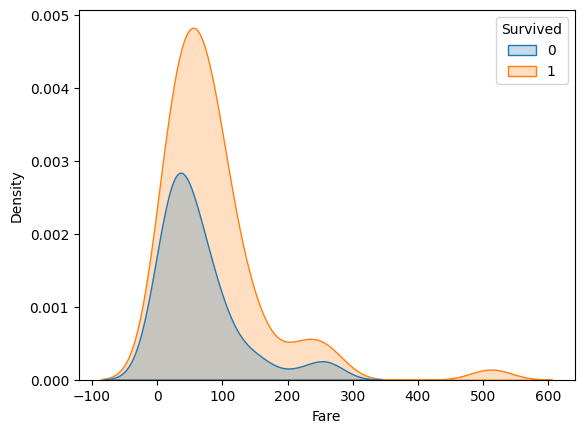

In [30]:
sns.kdeplot(data=Titanic_Clean_Data, x='Fare', hue='Survived', shade=True)

<ipython-input-31-b4d30fbc0cb4>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Titanic_Clean_Data, x='Pclass', hue='Survived', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

<Axes: xlabel='Pclass', ylabel='Density'>

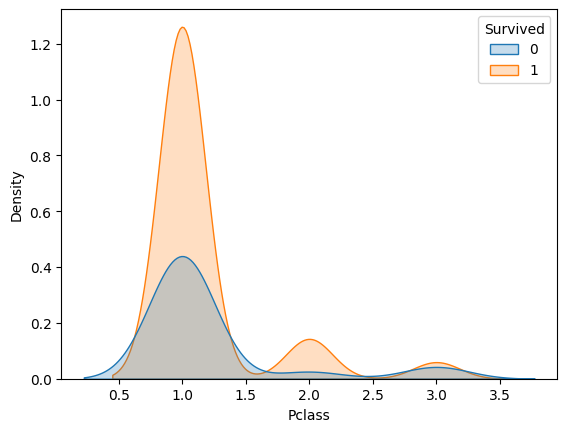

In [31]:
sns.kdeplot(data=Titanic_Clean_Data, x='Pclass', hue='Survived', shade=True)

In [11]:
Titanic_Clean_Data_values_count = Titanic_Clean_Data.Pclass.value_counts()
print(Titanic_Clean_Data_values_count)
print(Titanic_Data_values_count)



Pclass
1    158
2     15
3     10
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [ ]:
#Just testingt on what I can do
print(Titanic_Clean_Data_values_count[1])

In [12]:
#Percentage_Of_Data_Dropped - PoDD
i = 1
while(i != 4):
    PoDD = 100 - ((Titanic_Clean_Data_values_count[i] / Titanic_Data_values_count[i]) * 100) 
    print("The percentage of the Pclass " + str(i) +" data that was lost by dropna: " + str(round(PoDD)) + " %")
    i = i + 1

The percentage of the Pclass 1 data that was lost by dropna: 27 %
The percentage of the Pclass 2 data that was lost by dropna: 92 %
The percentage of the Pclass 3 data that was lost by dropna: 98 %


In [13]:
P1_clean_values_count = Titanic_Clean_Data.loc[(Titanic_Clean_Data.Pclass == 1) ]
P1_clean_values_count.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
P2_clean_values_count = Titanic_Clean_Data.loc[(Titanic_Clean_Data.Pclass == 2) ]
P2_clean_values_count.tail()

In [100]:
P3_clean_values_count = Titanic_Clean_Data.loc[(Titanic_Clean_Data.Pclass == 3) ]
P3_clean_values_count.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.050,E10,S
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.650,F G63,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.650,F G73,S
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.475,E121,S
823,824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.475,E121,S


In [ ]:
print(P1_clean_values_count.Embarked.value_counts())
print(P2_clean_values_count.Embarked.value_counts())
print(P3_clean_values_count.Embarked.value_counts())

In [99]:
print("The mean of the ages of the Pclass 1 data: " + str(P1_values_count.Age.mean()))
print("The mean of the ages of the Pclass 2 data: " + str(P2_values_count.Age.mean()))
print("The mean of the ages of the Pclass 3 data: " + str(P3_values_count.Age.mean()))

print()

print("The mean of the ages of the Pclass 1 data: " + str(P1_clean_values_count.Age.mean()))
print("The mean of the ages of the Pclass 2 data: " + str(P2_clean_values_count.Age.mean()))
print("The mean of the ages of the Pclass 3 data: " + str(P3_clean_values_count.Age.mean()))

The mean of the ages of the Pclass 1 data: 38.233440860215055
The mean of the ages of the Pclass 2 data: 29.87763005780347
The mean of the ages of the Pclass 3 data: 25.14061971830986

The mean of the ages of the Pclass 1 data: 37.59126582278481
The mean of the ages of the Pclass 2 data: 25.266666666666666
The mean of the ages of the Pclass 3 data: 21.0


In [ ]:
sns.kdeplot(data=Titanic_Data, x='Pclass', hue='Embarked', shade=True)

In [ ]:
sns.kdeplot(data=Titanic_Data, x='Pclass', hue='Sex', shade=True)

# **Using the average values as replacemnet for our unknowns**

Like was said previously another solution for cleaening our messy data was to get the values average of the data points before and rhe unknow and use that as the unknowns new value (lucky this olsutionm has less error than the previous one). We will implement this method Titanic_Clean_Data2 data set as it only have variables we deem important such as 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', and 'Embarked'. 

In [34]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print("Setup 3 Complete")

Setup 3 Complete


In [98]:
Titanic_Data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
my_imputer = SimpleImputer()
#Titanic_Clean_Data2 = pd.DataFrame(my_imputer.fit_transform(Titanic_Data.Age))
Titanic_Clean_Data2 = Titanic_Data
Titanic_Clean_Data2.Age = pd.DataFrame(my_imputer.fit_transform(Titanic_Clean_Data2[['Age']]), columns=['Age'])
#We can use dropna sine only just 2 row have unknows 
Titanic_Clean_Data2 = Titanic_Clean_Data2.dropna(subset=['Embarked'])

Titanic_Clean_Data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [13]:
missing_values_count3 = Titanic_Clean_Data2.isnull().sum()
missing_values_count3

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<ipython-input-77-af554eb53392>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=Titanic_Clean_Data2, x='Age', hue='Survived', shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Age', ylabel='Density'>

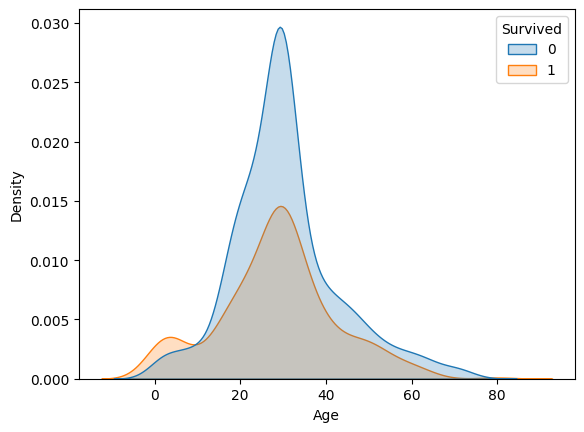

In [77]:
sns.kdeplot(data=Titanic_Clean_Data2, x='Age', hue='Survived', shade=True)

In [38]:

a = Titanic_Clean_Data2.drop(columns=['Name'])
print(a.columns)
print()

b = a.drop(columns=['Ticket'])
print(b.columns)
print()

c = b.drop(columns=['Cabin'])
print(c.columns)
print()

d = c[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked']]
print(d.columns)
print()

e = d[['Pclass', 'Fare']]
print(e.columns)
print()

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

Index(['Pclass', 'Fare'], dtype='object')



In [39]:
#ordinal_encoder.fit_transform(X_train[object_cols])
ordinal_encoder = OrdinalEncoder()
Titanic_Clean_Data3 = pd.DataFrame(ordinal_encoder.fit_transform(d))

Titanic_Clean_Data3

,0,1,2,3,4,5,6
0,2.0,1.0,28.0,1.0,0.0,18.0,2.0
1,0.0,0.0,52.0,1.0,0.0,207.0,0.0
2,2.0,0.0,34.0,0.0,0.0,41.0,2.0
3,0.0,0.0,48.0,1.0,0.0,189.0,2.0
4,2.0,1.0,48.0,0.0,0.0,43.0,2.0
...,...,...,...,...,...,...,...
884,1.0,1.0,35.0,0.0,0.0,85.0,2.0
885,0.0,0.0,24.0,0.0,0.0,153.0,2.0
886,2.0,0.0,39.0,1.0,2.0,131.0,2.0
887,0.0,1.0,34.0,0.0,0.0,153.0,0.0


In [ ]:
Titanic_Clean_Data3[0][1]

In [40]:
missing_values_count2 = Titanic_Clean_Data3.isnull().sum()
missing_values_count2

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

# **Using the most important variables first**

Titanic_Clean_Data4 will only contain the variable 'Fare' and 'Pclass' since that directly ties into rather or not someone is poor and as shown before you are more likely nit surviving if you of lower class. 

In [26]:
Titanic_Clean_Data4 = e
Titanic_Clean_Data4

,Pclass,Fare
0,3,7.2500
1,1,71.2833
2,3,7.9250
3,1,53.1000
4,3,8.0500
...,...,...
886,2,13.0000
887,1,30.0000
888,3,23.4500
889,1,30.0000


In [23]:
total_cells3 = np.product(train_X.shape)
print(total_cells3)

total_cells4 = np.product(train_y.shape)
print(total_cells4)

total_cells3 = np.product(X.shape)
print(total_cells3)

total_cells4 = np.product(y.shape)
print(total_cells4)

NameError: name 'train_X' is not defined

In [ ]:
d

In [ ]:
e

In [ ]:
X

In [27]:
X = Titanic_Clean_Data4
y = Titanic_Clean_Data2['Survived']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [90]:
total_Dcells = np.product(d)
print(total_Dcells)

total_Eells = np.product(e)
print(total_Eells)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


TypeError: can't multiply sequence by non-int of type 'str'

# **Finally using our models!**

First we will see use Titanic_Clean_Data4 as we will need to know how arrcate our model will be predciting who survived base on thes etwo variables. First we used Random Tress and than later Logestic Regression as it will prove to be about bwtween 62-68 pefcent accrate with logestic taken the cake.

Next we will use Titanic_Clean_Data3 to comapre with our previous models with Random tress anmd Logestic Regressionhaving a more accrate predcition with this dataset than previously. 

This showcases how despite wealth be a huge factor bthat will predictive most of the time rathe ror not someone will survive, have other factors such as Age or Sex can increase that prediction (even just a little bit).

In [28]:
lg_model = LogisticRegression()
lg_model.fit(train_X, train_y)
y_pred_lg = lg_model.predict(val_X)
val_mae_lg = mean_absolute_error(val_y, y_pred_lg)
print(val_mae_lg)

0.32286995515695066


In [29]:
RT_model = RandomForestRegressor(random_state=1)
RT_model.fit(train_X, train_y)
y_pred_RT = RT_model.predict(val_X)
val_mae_RT = mean_absolute_error(val_y, y_pred_RT)
print(val_mae_RT)

0.3732881671543974


In [ ]:
y_pred2

In [ ]:
val_y

In [ ]:
y_pred

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
val_X

In [31]:
X2 = Titanic_Clean_Data3
y2 = Titanic_Clean_Data2['Survived']
train_X2, val_X2, train_y2, val_y2 = train_test_split(X2, y2, random_state=1)

In [23]:
Titanic_Clean_Data3

,0,1,2,3,4,5,6
0,2.0,1.0,28.0,1.0,0.0,18.0,2.0
1,0.0,0.0,52.0,1.0,0.0,207.0,0.0
2,2.0,0.0,34.0,0.0,0.0,41.0,2.0
3,0.0,0.0,48.0,1.0,0.0,189.0,2.0
4,2.0,1.0,48.0,0.0,0.0,43.0,2.0
...,...,...,...,...,...,...,...
884,1.0,1.0,35.0,0.0,0.0,85.0,2.0
885,0.0,0.0,24.0,0.0,0.0,153.0,2.0
886,2.0,0.0,39.0,1.0,2.0,131.0,2.0
887,0.0,1.0,34.0,0.0,0.0,153.0,0.0


In [140]:
X2

,0,1,2,3,4,5,6
0,2.0,1.0,28.0,1.0,0.0,18.0,2.0
1,0.0,0.0,52.0,1.0,0.0,207.0,0.0
2,2.0,0.0,34.0,0.0,0.0,41.0,2.0
3,0.0,0.0,48.0,1.0,0.0,189.0,2.0
4,2.0,1.0,48.0,0.0,0.0,43.0,2.0
...,...,...,...,...,...,...,...
884,1.0,1.0,35.0,0.0,0.0,85.0,2.0
885,0.0,0.0,24.0,0.0,0.0,153.0,2.0
886,2.0,0.0,39.0,1.0,2.0,131.0,2.0
887,0.0,1.0,34.0,0.0,0.0,153.0,0.0


In [141]:
y2

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [32]:
lg_model2 = LogisticRegression()
lg_model2.fit(train_X2, train_y2)
y_pred_lg2 = lg_model2.predict(val_X2)
val_mae_lg2 = mean_absolute_error(val_y2, y_pred_lg2)
print(val_mae_lg2)

0.16591928251121077


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
RT_model2 = RandomForestRegressor(random_state=1)
RT_model2.fit(train_X2, train_y2)
y_pred_RT2 = RT_model2.predict(val_X2)
val_mae_RT2 = mean_absolute_error(val_y2, y_pred_RT2)
print(val_mae_RT2)

0.23833180944615923


In [49]:
print(classification_report(val_y, y_pred_lg))
print()

print(classification_report(val_y2, y_pred_lg2))
print()

#print(classification_report(val_y, y_pred_RT))
print()

#print(classification_report(val_y2, y_pred_RT2))
print()

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       138
           1       0.60      0.46      0.52        85

    accuracy                           0.68       223
   macro avg       0.65      0.64      0.64       223
weighted avg       0.67      0.68      0.67       223


              precision    recall  f1-score   support

           0       0.87      0.86      0.86       138
           1       0.77      0.80      0.79        85

    accuracy                           0.83       223
   macro avg       0.82      0.83      0.83       223
weighted avg       0.84      0.83      0.83       223






In [37]:
#accuracy_score

print(accuracy_score(val_y, y_pred_lg))
print()

print(accuracy_score(val_y2, y_pred_lg2))
print(val_mae_lg2)

#Note: Can't use accuracy_score for regressions models
#print(accuracy_score(val_y, y_pred_RT))
#print()

#print(accuracy_score(val_y2, y_pred_RT2))
#print()
#



0.6771300448430493

0.8340807174887892
0.8340807174887892


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [39]:
#My idea to find another way find the accuracy socre
# {(The max value of the y dataset) - mean_absolute_error } / (The max value of the y dataset)

print(accuracy_score(val_y2, y_pred_lg2))
print((1- val_mae_lg2)/1)

#It workes!

0.8340807174887892
0.8340807174887892


In [43]:
print("Log Regression model 1 when dropping the missing values accuracy_score %: ")
print(accuracy_score(val_y, y_pred_lg)) 
print()

print("Log Regression model 2 with missing values subsituted with averages accuracy_score %: ")
print(accuracy_score(val_y2, y_pred_lg2))
print()

print("Random Trees model 1 when dropping the missing values accuracy_score %: ")
print( ((1 - val_mae_RT)/1) )
print()

print("Random Trees model 2 with missing values subsituted with averages accuracy_score %: ")
print( ((1 - val_mae_RT2)/1) )
print()

Log Regression model 1 when dropping the missing values accuracy_score %: 
0.6771300448430493

Log Regression model 2 with missing values subsituted with averages accuracy_score %: 
0.8340807174887892

Random Trees model 1 when dropping the missing values accuracy_score %: 
0.6267118328456026

Random Trees model 2 with missing values subsituted with averages accuracy_score %: 
0.7616681905538407



In [81]:
Titanic_True_Data_Path = '/kaggle/input/titanic/test.csv'
Titanic_True_Data = pd.read_csv(Titanic_True_Data_Path)
Titanic_True_Data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [85]:
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Titanic_True_Data2 = Titanic_True_Data[columns]

missing_values_count4 = Titanic_True_Data2.isnull().sum()
missing_values_count4

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [86]:

Titanic_True_Data2.Age = pd.DataFrame(my_imputer.fit_transform(Titanic_Clean_Data2[['Age']]), columns=['Age'])
Titanic_True_Data2.Fare = pd.DataFrame(my_imputer.fit_transform(Titanic_Clean_Data2[['Fare']]), columns=['Fare'])


Titanic_Clean_True_Data = pd.DataFrame(ordinal_encoder.fit_transform(Titanic_True_Data2))


Titanic_Clean_True_Data

<ipython-input-86-f13abde47d39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titanic_True_Data2.Age = pd.DataFrame(my_imputer.fit_transform(Titanic_Clean_Data2[['Age']]), columns=['Age'])
<ipython-input-86-f13abde47d39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Titanic_True_Data2.Fare = pd.DataFrame(my_imputer.fit_transform(Titanic_Clean_Data2[['Fare']]), columns=['Fare'])


,0,1,2,3,4,5,6
0,2.0,1.0,22.0,0.0,0.0,12.0,1.0
1,2.0,0.0,43.0,1.0,0.0,139.0,2.0
2,1.0,1.0,27.0,0.0,0.0,26.0,1.0
3,2.0,1.0,39.0,0.0,0.0,126.0,2.0
4,2.0,0.0,39.0,1.0,1.0,28.0,2.0
...,...,...,...,...,...,...,...
413,2.0,1.0,50.0,0.0,0.0,26.0,2.0
414,0.0,0.0,32.0,0.0,0.0,28.0,0.0
415,2.0,1.0,38.0,0.0,0.0,110.0,2.0
416,2.0,1.0,17.0,0.0,0.0,54.0,2.0


# **Final Submission**

Since Logestic Regression was the best in terms of accracy for both dataset that will be the modle we be using for prediction base on out test data set with the odel being trained on Titanic_Clean_Data3 dataset as it give the model the highest accracy out all the models so far (83%). Once we get out predictions fromour modelwe would submit them in a CSV file in order tos ee what our rank is in the itanic - Machine Learning from Disaster competion.

In [87]:
#my_imputer = SimpleImputer()

final_X = Titanic_Clean_True_Data
y_final_pred = lg_model2.predict(final_X)

In [88]:
submission = pd.DataFrame({"PassengerId": Titanic_True_Data.PassengerId, "Survived": y_final_pred})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [76]:
submission.to_csv("submission.csv", index=False)

### **The End** 